In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df_c = pd.read_csv('/kaggle/input/rta-missing-value-imputed/RTA_constant.csv')
df_freq = pd.read_csv('/kaggle/input/rta-missing-value-imputed/RTA_most_freq.csv')

# Encoding (Converting Categorical Variable to Number)
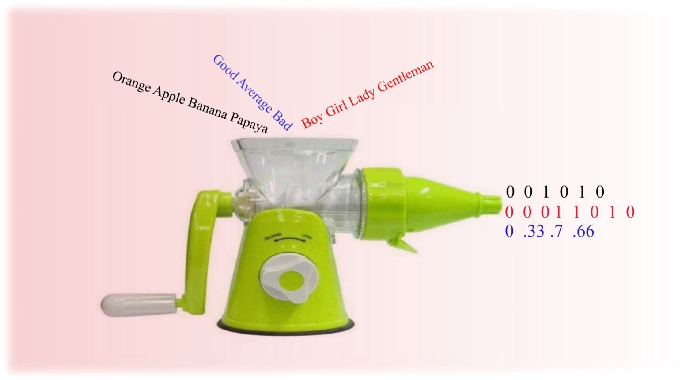!

In [ ]:
# Ordinal Encoding for missing value constant stratergy RTA
severity_dict = {"Slight Injury": 1,
                "Serious Injury": 2,
                "Fatal injury": 3}
df_c['Accident_severity_ordinal'] = df_c.Accident_severity.map(severity_dict)
df_c.sample(3)

In [ ]:
# Oridanl Encoding for the other...
severity_dict = {"Slight Injury": 1,
                "Serious Injury": 2,
                "Fatal injury": 3}
df_freq['Accident_severity_Ordinal'] = df_freq.Accident_severity.map(severity_dict)
df_freq.sample(3)

### NOTE: Encoding is Done to all columns with category as dtype! Encoding is required in any type of problem be it ML. DL, CV, NLP.

## Cleaning Data :::  Replacing na with unknown for *RTA_constant* dataset ...

In [ ]:
# Get a list of column names with dtype 'object'
object_columns = df_c.select_dtypes(include=['object']).columns

# Loop through each object column and get the total number of categories
for column_name in object_columns:
    num_categories = df_c[column_name].nunique()
    
    print(f"Column: {column_name}")
    print(f"Total number of categories: {num_categories}")
    print("\n")

## Column/Dimension wise Data Cleaning !


In [ ]:
# Cleaning the Data :::  Replacing similar meaning categories with unknown ....


# Get a list of column names with dtype 'object'
object_columns = df_c.select_dtypes(include=['object']).columns

# Loop through each object column and merge "missing_value" and "unknown" into "unknown"
for column_name in object_columns:
    df_c[column_name].replace(['missing_value','Unknown', 'unknown'], 'unknown', inplace=True)

In [ ]:
# Stripping empty trailing and leading empty spaces in categories .......

# Get a list of column names with dtype 'object'
object_columns = df_c.select_dtypes(include=['object']).columns

# Loop through each object column and strip white spaces
for column_name in object_columns:
    df_c[column_name] = df_c[column_name].str.strip()

In [ ]:
# Some granular cleaning is necessary when we take a look at "df_c['col_name'].value_counts()" for all columns!
df_c['Cause_of_accident'].replace(['unknown','Other'], 'unknown', inplace=True)


In [ ]:
df_c['Accident_severity'].value_counts()

In [ ]:
df_c.sample(3)

## Cleaning Datatset ::: NOT Replacing na with unknown for RTA_most_frequent dataset ...

In [ ]:
df_freq.columns

In [ ]:
df_freq['Educational_level'].value_counts()

In [ ]:
# Get a list of column names with dtype 'object'
object_columns = df_freq.select_dtypes(include=['object']).columns

# Loop through each object column and strip white spaces
for column_name in object_columns:
    df_freq[column_name] = df_freq[column_name].str.strip()

In [ ]:
# Some granular cleaning is necessary when we take a look at "df_c['col_name'].value_counts()" for all columns!
df_freq['Area_accident_occured'].replace(['Rural village areasOffice areas'], 'Unknown', inplace=True)

In [ ]:
df_freq['Area_accident_occured'].value_counts()

In [ ]:
# Get a list of column names with dtype 'object'
object_columns = df_freq.select_dtypes(include=['object']).columns

# Loop through each object column and get the total number of categories
for column_name in object_columns:
    num_categories = df_freq[column_name].nunique()
    
    print(f"Column: {column_name}")
    print(f"Total number of categories: {num_categories}")

In [ ]:
def OHE(df, columns_to_encode):
    """
    Perform One-Hot Encoding on selected columns in a DataFrame and add column name as a prefix to encoded columns.

    Parameters:
    - df: pandas DataFrame
        The input DataFrame.
    - columns_to_encode: list of str
        A list of column names to one-hot encode.

    Returns:
    - encoded_df: pandas DataFrame
        The DataFrame with specified columns one-hot encoded with prefixes.
    """
    encoded_df = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)
    return encoded_df

In [ ]:
cols_to_encode = ['Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident']
df_encoded1 = OHE(df_c,cols_to_encode)

In [ ]:
# Label Encoding Day_of_week .... column
df_encoded1['Day_of_week'].unique() # get unique values in the columns
df_encoded1.replace({
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
},inplace=True)

In [ ]:
# Dropping Accident_severity column !
df_encoded1.drop('Accident_severity', axis=1, inplace=True)

In [ ]:
# Change boolean columns to integer (bool to int)
df_encoded1 = df_encoded1.astype(int)

In [ ]:
df_encoded1.sample()

In [ ]:
df_encoded1.to_csv("RTA_const_encoded.csv")

In [ ]:
cols_to_encode = ['Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident']
df_encoded2 = OHE(df_freq,cols_to_encode)

In [ ]:
# Label Encoding Day_of_week .... column
df_encoded2['Day_of_week'].unique() # get unique values in the columns
df_encoded2.replace({
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
},inplace=True)

In [ ]:
df_encoded2.columns

In [ ]:
# Oridanl Encoding for the other...
severity_dict = {"Slight Injury": 1,
                "Serious Injury": 2,
                "Fatal injury": 3}
df_encoded2['Accident_severity_Ordinal'] = df_encoded2.Accident_severity.map(severity_dict)

In [ ]:
# Dropping Accident_severity column !
df_encoded2.drop('Accident_severity', axis=1, inplace=True)

In [ ]:
boolean_columns = []

for column in df_encoded2.columns:
    if df_encoded2[column].dtype == bool:
        boolean_columns.append(column)

for column in boolean_columns:
    df_encoded2[column] = df_encoded2[column].astype(int)

In [ ]:
df_encoded2['Hour'] = pd.to_datetime(df_encoded2['Time']).dt.hour
df_encoded2['Minute'] = pd.to_datetime(df_encoded2['Time']).dt.minute
df_encoded2['Second'] = pd.to_datetime(df_encoded2['Time']).dt.second

In [ ]:
df_encoded2.drop('Time',axis=1,inplace=True)

In [ ]:
df_encoded2.shape

In [ ]:
df_encoded2.to_csv("RTA_most_freq_encoded1.csv")

## Cheat Sheet For Choosing The Correct Encoding Technique...
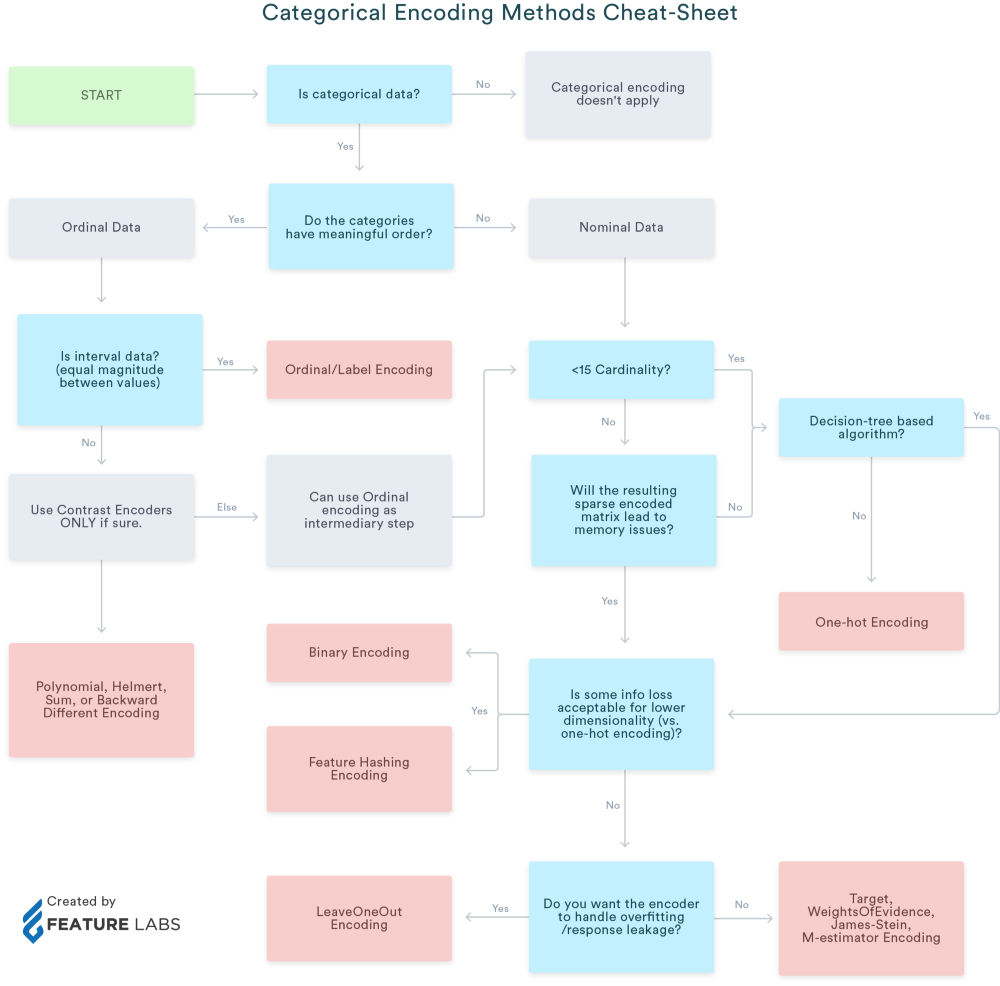!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Imbalanced Dataset Treatment

In [ ]:
df_enc = pd.read_csv("/kaggle/input/rta-missing-value-imputed/RTA_most_freq_encoded1.csv")

In [ ]:
df_enc.shape

In [ ]:
df_enc = df_enc.drop(['Unnamed: 0'],axis=1)

In [ ]:
# Assuming df_enc is your DataFrame
X = df_enc.drop(columns=["Accident_severity_Ordinal"])
y = df_enc["Accident_severity_Ordinal"]


In [ ]:
X.columns

In [ ]:
df_enc.Accident_severity_Ordinal.value_counts().plot(kind='bar',title='Count (Severity)')

In [ ]:
df_enc.Accident_severity_Ordinal.value_counts()

## Implemnting imblearn > SMOTE and SMOTE with TOMEK links 

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter

In [ ]:
# Check the class distribution
print("Class distribution before resampling:", Counter(y))

In [ ]:
# SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
y_resampled.value_counts().plot(kind='bar',title='Count (Severity)')

In [ ]:
# SMOTE and Tomek links
smote_tomek = SMOTETomek(random_state=42)
X_resampled_st, y_resampled_st = smote_tomek.fit_resample(X, y)

In [ ]:
y_resampled_st.value_counts().plot(kind='bar',title='Count (Severity)')

In [ ]:
X_resampled_st.shape

In [ ]:
y_resampled_st.shape

In [ ]:
df_enc_sam = pd.concat([X_resampled_st, y_resampled_st], axis=1)

In [ ]:
df_enc_sam.sample(3)

In [ ]:
df_enc_sam.shape

In [ ]:
df_enc_sam.to_csv("RTA_most_freq_enc_sam.csv")

# Start From here !>>>>>>>>>>>>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/rta-missing-value-imputed/RTA_most_freq_enc_sam.csv


In [3]:
df_enc_sam = pd.read_csv("/kaggle/input/rta-missing-value-imputed/RTA_most_freq_enc_sam.csv")
df_enc_sam.drop(["Unnamed: 0"],axis=1,inplace=True)

In [4]:
df_enc_sam.shape # (31233, 202)

(31233, 202)

In [5]:
X = df_enc_sam.drop(["Accident_severity_Ordinal"],axis=1)
y = df_enc_sam["Accident_severity_Ordinal"]

In [5]:
X.columns

Index(['Day_of_week', 'Number_of_vehicles_involved', 'Number_of_casualties',
       'Age_band_of_driver_18-30', 'Age_band_of_driver_31-50',
       'Age_band_of_driver_Over 51', 'Age_band_of_driver_Under 18',
       'Age_band_of_driver_Unknown', 'Sex_of_driver_Female',
       'Sex_of_driver_Male',
       ...
       'Cause_of_accident_Other', 'Cause_of_accident_Overloading',
       'Cause_of_accident_Overspeed', 'Cause_of_accident_Overtaking',
       'Cause_of_accident_Overturning', 'Cause_of_accident_Turnover',
       'Cause_of_accident_Unknown', 'Hour', 'Minute', 'Second'],
      dtype='object', length=201)

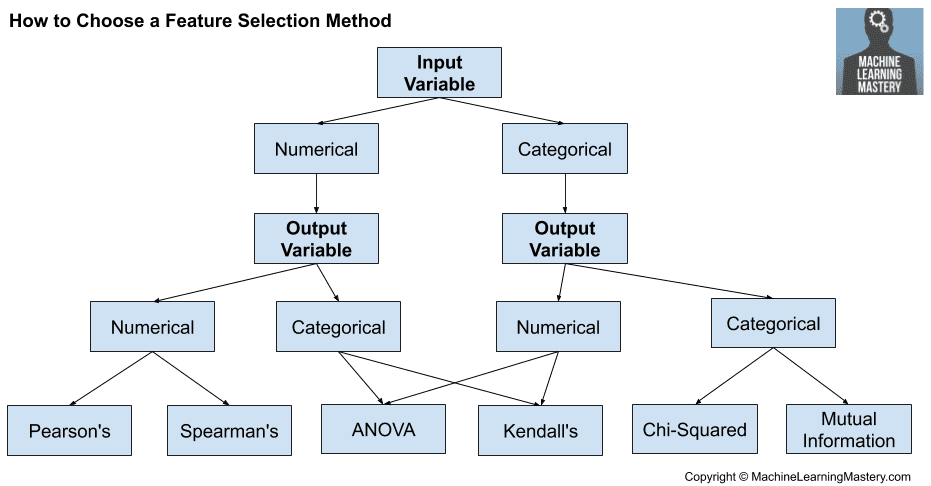

### Will be using SMOTE-Tomek links resampled data !

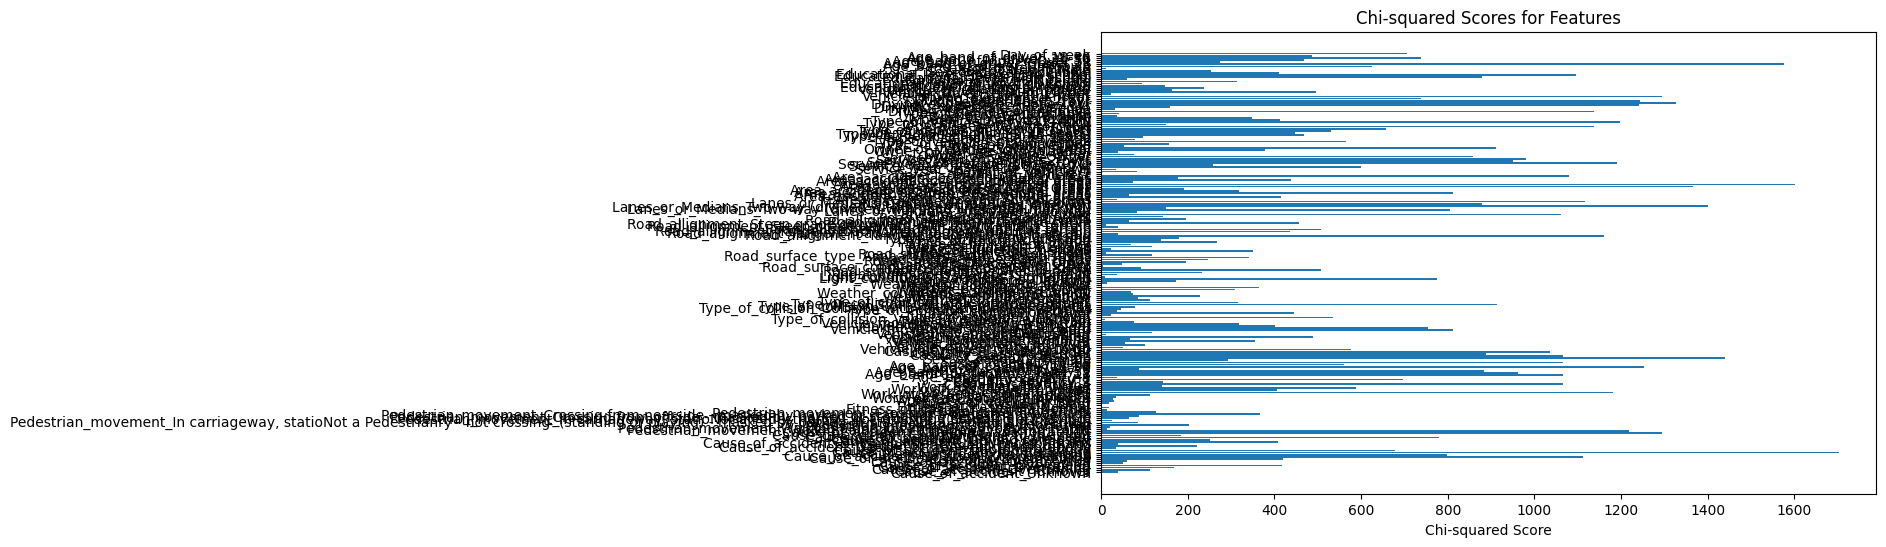

In [7]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2

# WE need to drop numerical features for using chi-sqare technique ########################################################_____IMP!
X_new = X.drop(["Number_of_casualties", 'Number_of_vehicles_involved',
            "Second", "Hour", "Minute"], axis=1)

# Compute Chi-squared scores
chi2_scores, _ = chi2(X_new, y)

# Create a list of feature names (assuming X is a pandas DataFrame)
feature_names = X_new.columns

# Create a bar plot to visualize the scores
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), chi2_scores, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Chi-squared Score')
plt.title('Chi-squared Scores for Features')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()


In [8]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k='all') # Selecting ALL Features !!!!!!!!!!!!!!!!!!!!!!
X_new = selector.fit_transform(X_new, y)
selected_feature_indices = selector.get_support(indices=True)
# selected_features = [your_feature_names[i] for i in selected_feature_indices]

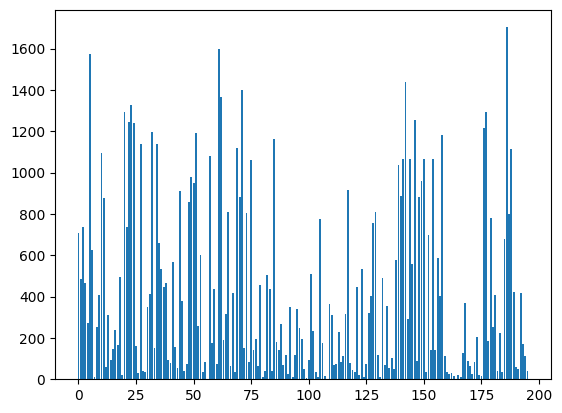

In [9]:
# what are scores for the features
# for i in range(len(selector.scores_)):
#  print('Feature %d: %f' % (i, selector.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(selector.scores_))], selector.scores_)
plt.show()

In [10]:
import numpy as np

# Sort the chi-square scores and corresponding feature names in descending order
sorted_indices = np.argsort(chi2_scores)[::-1]
sorted_feature_names = np.array(feature_names)[sorted_indices]
z = 150
# Get the top 20 feature names
top_z_feature_names = sorted_feature_names[:z]

# Print the top 20 feature names
print(top_z_feature_names)


['Cause_of_accident_No distancing' 'Area_accident_occured_Office areas'
 'Age_band_of_driver_Unknown' 'Sex_of_casualty_Female'
 'Lanes_or_Medians_Two-way (divided with broken lines road marking)'
 'Area_accident_occured_Other' 'Driving_experience_Above 10yr'
 'Cause_of_accident_Changing lane to the right' 'Driving_experience_1-2yr'
 'Age_band_of_casualty_31-50' 'Driving_experience_5-10yr'
 'Driving_experience_Below 1yr'
 'Cause_of_accident_Changing lane to the left'
 'Type_of_vehicle_Lorry (41?100Q)' 'Service_year_of_vehicle_Above 10yr'
 'Work_of_casuality_Self-employed' 'Types_of_Junction_Crossing'
 'Type_of_vehicle_Automobile' 'Type_of_vehicle_Other'
 'Lanes_or_Medians_Double carriageway (median)'
 'Cause_of_accident_No priority to vehicle'
 'Educational_level_Elementary school'
 'Area_accident_occured_Church areas' 'Casualty_class_na'
 'Casualty_severity_na' 'Sex_of_casualty_na' 'Age_band_of_casualty_na'
 'Lanes_or_Medians_other' 'Casualty_class_Passenger'
 'Service_year_of_vehicle_

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import numpy as np

## Did not used Feature Selection Technique...

# Assuming df_enc_sam is your DataFrame with features and target
X = df_enc_sam.drop(["Accident_severity_Ordinal"],axis=1)
y = df_enc_sam["Accident_severity_Ordinal"]
# For further metrics visualization!
mean_f1_scores = []
std_f1_scores = []
# Define the number of folds (K)
num_folds = 10  # You can adjust this number as needed

# Initialize classifiers
# classifiers = {
#     "Random Forest": RandomForestClassifier(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Naive Bayes": GaussianNB(),
#     "K-Nearest Neighbors": KNeighborsClassifier()
# }

# Initialize K-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)  # You can set a random seed for reproducibility
'''
# Perform K-fold cross-validation and calculate F1 score for each classifier
for clf_name, clf in classifiers.items():
    f1_scores = cross_val_score(clf, X, y, cv=kf, scoring='f1_macro')  # Use 'f1_macro' for multi-class problems
    mean_f1 = np.mean(f1_scores)
    mean_f1_scores.append(mean_f1) 
    std_f1 = np.std(f1_scores)
    std_f1_scores.append(std_f1) # Store the Mean Results in list for further visualization...
    
    # Display the cross-validation results for each classifier
    print(f"{clf_name} - Standard Deviation of F1 scores:", std_f1)
    print(f"{clf_name} - Mean F1 Score:", mean_f1)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")'''

'\n# Perform K-fold cross-validation and calculate F1 score for each classifier\nfor clf_name, clf in classifiers.items():\n    f1_scores = cross_val_score(clf, X, y, cv=kf, scoring=\'f1_macro\')  # Use \'f1_macro\' for multi-class problems\n    mean_f1 = np.mean(f1_scores)\n    mean_f1_scores.append(mean_f1) \n    std_f1 = np.std(f1_scores)\n    std_f1_scores.append(std_f1) # Store the Mean Results in list for further visualization...\n    \n    # Display the cross-validation results for each classifier\n    print(f"{clf_name} - Standard Deviation of F1 scores:", std_f1)\n    print(f"{clf_name} - Mean F1 Score:", mean_f1)\n    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")'

In [ ]:
import matplotlib.pyplot as plt

# Get the classifier names
classifier_names = classifiers.keys()

# Create a bar chart with error bars to compare classifier performance
plt.figure(figsize=(8, 6))
plt.bar(classifier_names, mean_f1_scores, color='skyblue', yerr=std_f1_scores, capsize=10)
plt.xlabel('Classifier')
plt.ylabel('Mean F1 Score')
plt.title('Classifier Performance Comparison with Error Bars')
plt.ylim([0, 1])  # Set the y-axis range from 0 to 1 for F1 scores
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add text labels with exact mean F1 scores on top of the bars
for i, mean_f1 in enumerate(mean_f1_scores):
    plt.text(i, mean_f1 + 0.02, f'{mean_f1:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [16]:
# splitting train test data ::::: 
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for each classifier
param_grid_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [2, 10, 80, 100],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [3, 4, 5]
}

param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_nb = {}  # No hyperparameters to tune for GaussianNB

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Create a dictionary of classifiers and their respective hyperparameter grids
classifiers = {
    "Random Forest": (RandomForestClassifier(), param_grid_rf)
#     ,     "Decision Tree": (DecisionTreeClassifier(), param_grid_dt),
#     "Naive Bayes": (GaussianNB(), param_grid_nb),
#     "K-Nearest Neighbors": (KNeighborsClassifier(), param_grid_knn)
}

# Initialize K-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform hyperparameter tuning using GridSearchCV for each classifier
best_models = {}

for clf_name, (clf, param_grid) in classifiers.items():
    grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='f1_macro')
    grid_search.fit(X, y)
    
    best_models[clf_name] = grid_search.best_estimator_
    
    print(f"Best {clf_name} Parameters: {grid_search.best_params_}")
    print(f"Best {clf_name} Mean F1 Score: {grid_search.best_score_:.4f}\n")

# Select the best model for each classifier based on F1 score
for clf_name, best_model in best_models.items():
    print(f"Best {clf_name} Model: {best_model}\n")

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

# Create the list of classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression()
}

# Create X and y (your features and target variables)

# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this number as needed

# Initialize KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=32)

# Iterate through each classifier and print F1 scores
for clf_name, clf in classifiers.items():
    f1_scores = cross_val_score(clf, X, y, cv=kf, scoring='f1_macro')
    mean_f1 = f1_scores.mean()
    print(f"{clf_name}: F1 Score - Mean: {mean_f1:.4f}, Std: {f1_scores.std():.4f}")


Random Forest: F1 Score - Mean: 0.9434, Std: 0.0026
Gradient Boosting: F1 Score - Mean: 0.8756, Std: 0.0033
Support Vector Machine: F1 Score - Mean: 0.8117, Std: 0.0047


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: F1 Score - Mean: 0.7851, Std: 0.0028


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

# Define the objective function to optimize
def objective(trial):
    # Define hyperparameters to search
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2,8)
    min_samples_leaf = trial.suggest_int('min_samples_leaf',  1, 6)

   
    # Create the Random Forest classifier with hyperparameters
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=32
    )

    # Train the classifier on the train data
    clf.fit(X_train, y_train)

    # Evaluate the classifier on the test data
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')

    return f1

# Create an Optuna study object
study = optuna.create_study(direction='maximize')

# Run the optimization
study.optimize(objective, n_trials=100)  # You can adjust the number of trials as needed

# Get the best hyperparameters
best_params = study.best_params
best_f1_score = study.best_value

print(f"Best F1 Score: {best_f1_score:.4f}")
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

[I 2023-09-11 04:14:10,795] A new study created in memory with name: no-name-8a0e4708-ca52-493f-93ea-2aa0edd9f049
[I 2023-09-11 04:14:14,107] Trial 0 finished with value: 0.9296395584176337 and parameters: {'n_estimators': 62, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9296395584176337.
[I 2023-09-11 04:14:15,224] Trial 1 finished with value: 0.7372873994890874 and parameters: {'n_estimators': 68, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.9296395584176337.
[I 2023-09-11 04:14:27,457] Trial 2 finished with value: 0.9301118809743896 and parameters: {'n_estimators': 277, 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.9301118809743896.
[I 2023-09-11 04:14:30,832] Trial 3 finished with value: 0.9291505405325203 and parameters: {'n_estimators': 76, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.

Best F1 Score: 0.9386
Best Hyperparameters:
n_estimators: 276
max_depth: 27
min_samples_split: 2
min_samples_leaf: 1


In [19]:
import joblib

# Create the Random Forest classifier with the best hyperparameters
clf = RandomForestClassifier(
    n_estimators=276,
    max_depth=27,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=32
)
# Train the classifier on the entire dataset
clf.fit(X_train, y_train)

#Making predictions
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f1)
# Save the model using joblib
joblib.dump(clf, 'random_forest_model.joblib')

0.9385783762942411


['random_forest_model.joblib']

In [20]:
# From further hyperparam tunning .....
import joblib
# from google colab:::::::::::::::::::::::::::::::::::::::::::::::::::::::
# Create the Random Forest classifier with the best hyperparameters
clf = RandomForestClassifier(
    n_estimators=222,
    max_depth=39,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=32
)
# Train the classifier on the entire dataset
clf.fit(X_train, y_train)

#Making predictions
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f1)
# Save the model using joblib
joblib.dump(clf, 'random_forest_model_v2.joblib')

0.9385864980669604


['random_forest_model_v2.joblib']

# Predicting using saved model !

In [2]:
import joblib
# Load pretrained model ::::: 
model = joblib.load('/kaggle/input/rta-missing-value-imputed/random_forest_model_v2.joblib') 